<a href="https://colab.research.google.com/github/bbbbbin2/2025_BigData/blob/main/notebook/%EC%9D%8C%EC%A3%BC%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [2]:
import pandas as pd

# 음주운전 교통사고 데이터 로드
df_alcohol1 = pd.read_excel("/content/음주운전(지역)교통사고통계.xlsx")
df_alcohol2 = pd.read_excel("/content/교통사고통계(음주 3년간).xlsx")
df_alcohol3 = pd.read_excel("/content/교통사고통계_음주운전(연령).xlsx")

df_alcohol1.head(), df_alcohol2.head(), df_alcohol3.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(   시도     연도        합계     2020     2021     2022     2023     2024
 0  합계  사고[건]   71279.0  17247.0  14894.0  15059.0  13042.0  11037.0
 1  합계  사망[명]    1004.0    287.0    206.0    214.0    159.0    138.0
 2  합계  부상[명]  113715.0  28063.0  23653.0  24261.0  20628.0  17110.0
 3  서울  사고[건]   10248.0   2327.0   2059.0   2348.0   1938.0   1576.0
 4  서울  사망[명]      82.0     16.0     23.0     23.0      8.0     12.0,
      월     연도     합계   2022 2022.1 2022.2 2022.3 2022.4  2022.5   2022.6  ...  \
 0    월     연도     합계     합계  0시~2시  2시~4시  4시~6시  6시~8시  8시~10시  10시~12시  ...   
 1   합계  사고[건]  39138  15059   2153   1154    801    692     575      396  ...   
 2   합계  사망[명]    511    214     30     33     26     11       6        5  ...   
 3   합계  부상[명]  61999  24261   3388   1672   1211    965     940      689  ...   
 4  01월  사고[건]   3391   1234     97     41     33     34      31       17  ...   
 
   2024.3 2024.4  2024.5   2024.6   2024.7   2024.8   2024.9  2024.10  2024.11  \
 0  4시~6시

In [3]:
import pandas as pd

# 엑셀 파일 로드 함수
def load_excel(path, header=0):
    return pd.read_excel(path, header=header)

# 두 줄 헤더를 단일 헤더로 정리하는 함수
def clean_two_header(df):
    df = df.copy()
    df.columns = df.iloc[0] # 첫 번째 행을 컬럼으로 설정
    df = df.iloc[1:].reset_index(drop=True) # 첫 번째 행 제거 및 인덱스 초기화
    return df

# 완전히 비어있는 행/열 제거 함수
def drop_empty(df):
    return df.dropna(how="all").dropna(axis=1, how="all")

# 숫자형 문자열을 int로 변환하는 함수
def to_int(df, cols):
    df = df.copy()
    for c in cols:
        if c in df.columns:
            # 문자열(쉼표, 하이픈 포함)을 숫자로 변환, 오류 발생 시 NaN으로 처리 후 0으로 채우고 int로 변환
            df[c] = pd.to_numeric(
                df[c].astype(str).str.replace(",", "").replace("-", "0"),
                errors='coerce'
            ).fillna(0).astype(int)
    return df

# 특정 값 (예: '합계', '알수없음')을 가진 행 제거 함수
def drop_values(df, col, values=("합계", "알수없음")):
    df = df.copy()
    for v in values:
        df = df[df[col] != v]
    return df

# 특정 컬럼 값이 일치하는 행 필터링 함수
def filter_eq(df, col, value):
    return df[df[col] == value].copy()

# 데이터프레임에서 연도 컬럼 자동 탐색 함수
def get_year_cols(df):
    return [c for c in df.columns if str(c).isdigit()]

# wide 형식 데이터를 long 형식으로 변환하는 함수
def melt_table(df, id_cols, value_cols,
               var_name="연도", value_name="값"):
    return df.melt(
        id_vars=id_cols,
        value_vars=value_cols,
        var_name=var_name,
        value_name=value_name
    )

# 지역명 통일 함수
def normalize_region(df, col):
    replace_dict = {
        "전라남도": "전남", "전라북도": "전북",
        "경상남도": "경남", "경상북도": "경북",
        "충청남도": "충남", "충청북도": "충북",
        "강원도": "강원",
        "부산광역시": "부산", "대구광역시": "대구",
        "광주광역시": "광주", "인천광역시": "인천",
        "대전광역시": "대전", "울산광역시": "울산",
        "제주특별자치도": "제주",
        "세종특별자치시": "세종",
        "서울특별시": "서울"
    }
    df = df.copy()
    df[col] = df[col].replace(replace_dict, regex=True)
    return df

# 후보 컬럼명 중 실제 데이터프레임에 존재하는 첫 번째 컬럼 반환 함수
def find_main_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"대표 컬럼을 찾을 수 없습니다: {candidates}")

In [4]:
import pandas as pd

df = df_alcohol3.copy()

# 2줄 헤더 처리
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

# 필터링 (연령대별)
df_accident = df[
    (df["연도"] == "사고[건]") &
    (df["가해운전자(1당) 연령대"] != "합계")
].copy()

# 사용할 컬럼 선택
cause_cols = [
    "중앙선 침범",
    "신호위반",
    "안전거리 미확보",
    "안전운전 의무 불이행",
    "교차로 통행방법 위반",
    "보행자 보호의무 위반",
    "기타"
]

df_heat = df_accident[
    ["가해운전자(1당) 연령대"] + cause_cols
].copy()

# 숫자형 변환
for c in cause_cols:
    df_heat[c] = (
        df_heat[c]
        .astype(str)
        .str.replace(",", "")
        .astype(int)
    )

df_heat = df_heat.set_index("가해운전자(1당) 연령대")

df_heat

,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,기타
가해운전자(1당) 연령대,,,,,,,
19세 이하,3,11,2,91,1,0,9
20-29세,121,158,80,1410,18,10,110
30-39세,127,169,121,1870,22,9,110
40-49세,139,169,102,1905,26,17,100
50-59세,139,111,112,1742,40,18,87
60-64세,67,35,39,732,15,8,23
65세 이상,76,36,53,726,12,5,51


In [5]:
# 연령대별 음주운전 사망자 데이터 (df_death_age) 전처리
# df_alcohol3 데이터 전처리
df_alcohol3_processed = clean_two_header(df_alcohol3)

# '연도' 컬럼이 '사망[명]'인 데이터 필터링
df_death_age = df_alcohol3_processed[df_alcohol3_processed['연도'] == '사망[명]'].copy()

# '가해운전자(1당) 연령대'가 '합계'인 행 제거
df_death_age = df_death_age[df_death_age['가해운전자(1당) 연령대'] != '합계']

# 필요한 컬럼만 선택하고 '합계' 컬럼을 숫자로 변환
df_death_age = df_death_age[['가해운전자(1당) 연령대', '합계']]
df_death_age = to_int(df_death_age, ['합계'])

# 컬럼명 통일
df_death_age.rename(columns={'가해운전자(1당) 연령대': '연령대'}, inplace=True)

display(df_death_age.head())

,연령대,합계
4,19세 이하,1
7,20-29세,54
10,30-39세,26
13,40-49세,12
16,50-59세,27


In [6]:
# df_alcohol1 데이터 전처리: 음주운전(지역) 교통사고 데이터를 long 형식으로 변환

# 1. '시도' 컬럼의 지역명 통일 (표준화)
df_alcohol1_processed = normalize_region(df_alcohol1, "시도")

# 2. '시도' 및 '연도' 컬럼에서 '합계' 행 필터링
df_alcohol1_processed = df_alcohol1_processed[df_alcohol1_processed['시도'] != '합계']
df_alcohol1_processed = df_alcohol1_processed[df_alcohol1_processed['연도'] != '합계']

# 3. long 형식으로 변환할 연도 컬럼 목록 추출
year_cols_alcohol1 = [col for col in df_alcohol1_processed.columns if str(col).isdigit()]

# 4. 숫자형 연도 컬럼들을 정수형으로 변환 (to_int 유틸리티 함수 사용)
df_alcohol1_processed = to_int(df_alcohol1_processed, year_cols_alcohol1)

# 5. wide 형식 데이터를 long 형식으로 변환
id_vars_alcohol1 = ['시도', '연도']
df_alcohol1_long = melt_table(df_alcohol1_processed,
                              id_cols=id_vars_alcohol1,
                              value_cols=year_cols_alcohol1,
                              var_name='년도',
                              value_name='값')

# 6. '년도' 컬럼을 정수형으로 변환
df_alcohol1_long['년도'] = df_alcohol1_long['년도'].astype(int)

# 전처리 결과 출력
print("전처리된 df_alcohol1 데이터의 상위 5행:")
display(df_alcohol1_long.head())
print("\n전처리된 df_alcohol1 데이터의 컬럼 정보:")
display(df_alcohol1_long.info())

전처리된 df_alcohol1 데이터의 상위 5행:


,시도,연도,년도,값
0,서울,사고[건],2020,2327
1,서울,사망[명],2020,16
2,서울,부상[명],2020,3817
3,부산,사고[건],2020,742
4,부산,사망[명],2020,5



전처리된 df_alcohol1 데이터의 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      265 non-null    object
 1   연도      255 non-null    object
 2   년도      265 non-null    int64 
 3   값       265 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.4+ KB


None

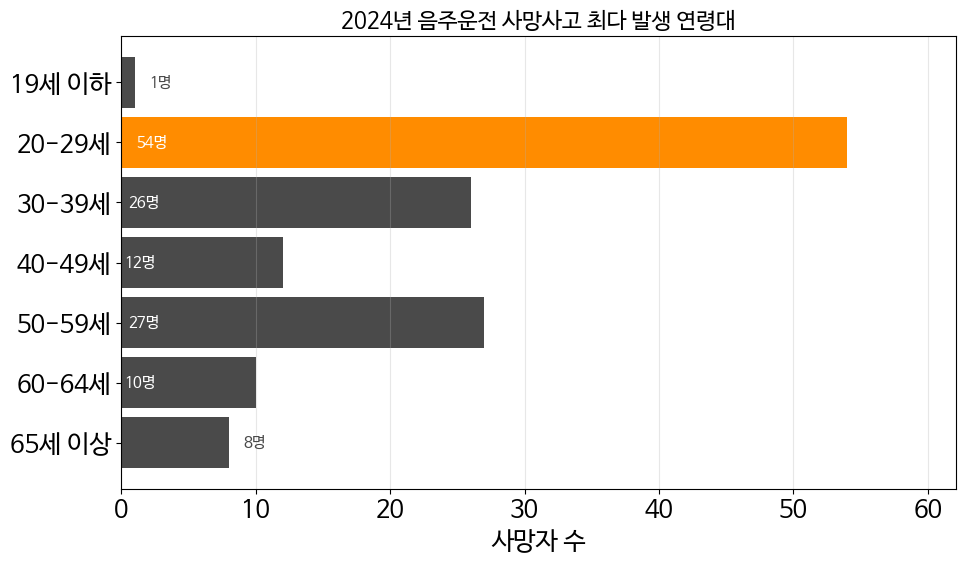

In [7]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_death_age["연령대"]
values = df_death_age["합계"]

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"
colors = [HIGHLIGHT if v == values.max() else BASE_COLOR for v in values]

y = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(
    y,
    values,
    color=colors,
    height=0.85
)

max_val = values.max()

for i, v in enumerate(values):
    if v < max_val * 0.15:  # 작은 값 (19세 이하 같은 경우)
        ax.text(
            v + max_val * 0.02,   # 막대 밖
            i,
            f"{int(v)}명",
            va="center",
            ha="left",
            fontsize=11,
            fontweight="bold",
            color=BASE_COLOR
        )
    else:
        ax.text(
            v * 0.02,            # 막대 안
            i,
            f"{int(v)}명",
            va="center",
            ha="left",
            fontsize=11,
            fontweight="bold",
            color="white"
        )

ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

#  오른쪽 여백 확보 (바깥 텍스트용)
ax.set_xlim(0, max_val * 1.15)

ax.set_title(
    "2024년 음주운전 사망사고 최다 발생 연령대",
    fontsize=16
)
ax.set_xlabel("사망자 수")
ax.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
# 시간대별 음주운전 사망자 데이터 (df_death) 전처리
df_alcohol2_copy = df_alcohol2.copy()

# Construct new column names by combining the first two header rows appropriately
new_cols = []
header_row_0 = df_alcohol2_copy.iloc[0].tolist()

for i, original_col_name in enumerate(df_alcohol2_copy.columns):
    if i == 0: # First column is '월'
        new_cols.append('월')
    elif i == 1: # Second column is '연도', which represents '유형' (사고[건], 사망[명], 부상[명])
        new_cols.append('유형')
    else:
        # Get year part from original column name (e.g., '2022', '2022.1' -> '2022')
        year_part = original_col_name.split('.')[0]
        # Get descriptive part from header_row_0 (e.g., '합계', '0시~2시')
        desc_part = header_row_0[i]

        if desc_part == '합계': # Year total
            new_cols.append(f"{year_part}_전체합계")
        else: # Time slot
            new_cols.append(f"{year_part}_{desc_part}")

df_alcohol2_copy.columns = new_cols
df_alcohol2_copy = df_alcohol2_copy.iloc[1:].reset_index(drop=True)

# '월'이 '합계'이고 '유형'이 '사망[명]'인 행만 추출
df_death_raw = df_alcohol2_copy[
    (df_alcohol2_copy['월'] == '합계') & (df_alcohol2_copy['유형'] == '사망[명]')
].copy()

# 시간대별 사망자 수 추출 및 합계 (2022, 2023, 2024년 데이터)
time_slots = [
    "0시~2시", "2시~4시", "4시~6시", "6시~8시",
    "8시~10시", "10시~12시", "12시~14시", "14시~16시",
    "16시~18시", "18시~20시", "20시~22시", "22시~24시"
]

death_by_time_slot = {}
for ts in time_slots:
    death_by_time_slot[ts] = 0
    for year in ['2022', '2023', '2024']:
        col_name = f"{year}_{ts}"
        if col_name in df_death_raw.columns:
            # Convert to int, handling errors and fillna
            val = pd.to_numeric(
                df_death_raw[col_name].astype(str).str.replace(",", "").replace("-", "0"),
                errors='coerce'
            ).fillna(0).astype(int).iloc[0]
            death_by_time_slot[ts] += val

# Convert to a DataFrame for plotting
df_death_summary = pd.DataFrame(death_by_time_slot.items(), columns=['시간대', '합계'])

# Calculate percentages (비율)
total_deaths = df_death_summary['합계'].sum()
df_death_summary['비율'] = (df_death_summary['합계'] / total_deaths) * 100

df_death = df_death_summary.copy()

display(df_death.head())

,시간대,합계,비율
0,0시~2시,77,15.068493
1,2시~4시,74,14.481409
2,4시~6시,55,10.763209
3,6시~8시,28,5.479452
4,8시~10시,17,3.326810


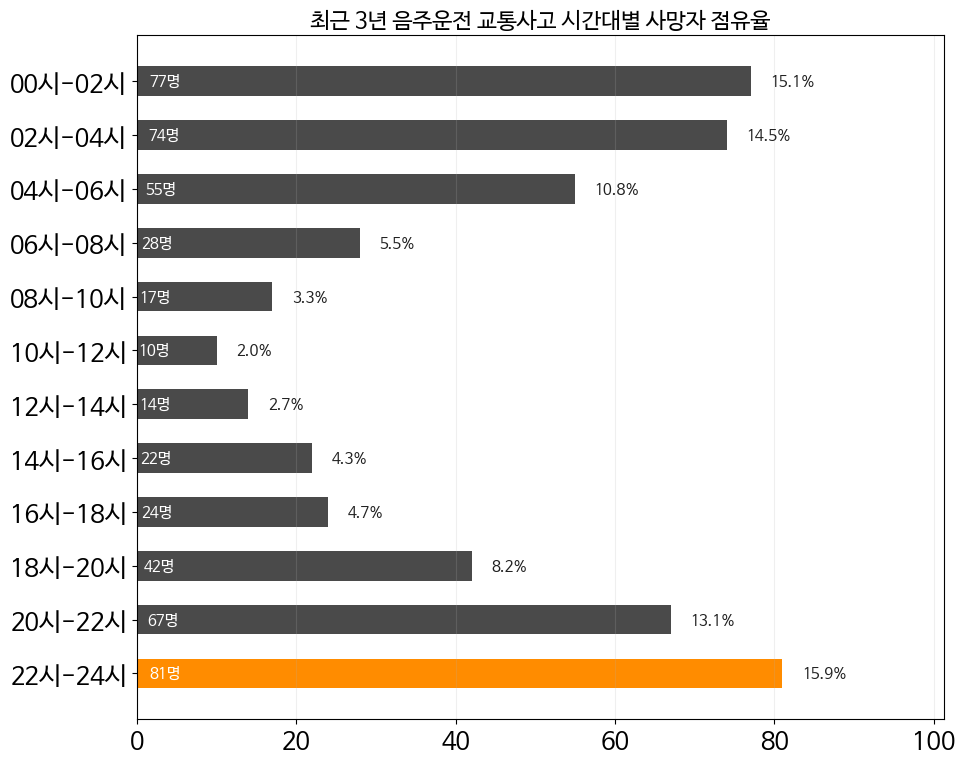

In [9]:
# 시간대별 음주 교통사고
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 시간대 표기 표준화 (0시-2시 → 00시-02시)
df_death["시간대"] = (
    df_death["시간대"]
    .astype(str)
    .str.strip()
    .str.replace("시", "", regex=False)
    .str.replace("~", "-", regex=False) # '0시~2시'를 '0시-2시'로 통일하여 split이 가능하게함
    .str.replace(" ", "", regex=False)
)

df_death["시간대"] = df_death["시간대"].apply(
    lambda x: f"{int(x.split('-')[0]):02d}시-{int(x.split('-')[1]):02d}시"
)

# 시간대 순서 정의
order = [
    "00시-02시", "02시-04시", "04시-06시", "06시-08시",
    "08시-10시", "10시-12시", "12시-14시", "14시-16시",
    "16시-18시", "18시-20시", "20시-22시", "22시-24시"
]

df_death_sorted = (
    df_death
    .set_index("시간대")
    .reindex(order)
    .reset_index()
)

times  = df_death_sorted["시간대"]
values = df_death_sorted["합계"]
rates  = df_death_sorted["비율"]

y = np.arange(len(times))

# 색상 설정 (최대값 강조)
BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"
colors = [HIGHLIGHT if v == values.max() else BASE_COLOR for v in values]

# 그래프 생성
plt.figure(figsize=(10, 8))
plt.barh(y, values, color=colors, height=0.55)

# 막대 사망자 수
for i, v in enumerate(values):
    plt.text(
        v * 0.02,
        i,
        f"{int(v)}명",
        va="center",
        ha="left",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

# 비율(%)
max_val = values.max()
for i, r in enumerate(rates):
    plt.text(
        values.iloc[i] + max_val * 0.03,
        i,
        f"{r:.1f}%",
        va="center",
        ha="left",
        fontsize=11,
        color="#222222"
    )

plt.yticks(y, times)
plt.title(
    "최근 3년 음주운전 교통사고 시간대별 사망자 점유율",
    fontsize=16
)

plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.2)
plt.xlim(0, max_val * 1.25)

plt.tight_layout()
plt.show()

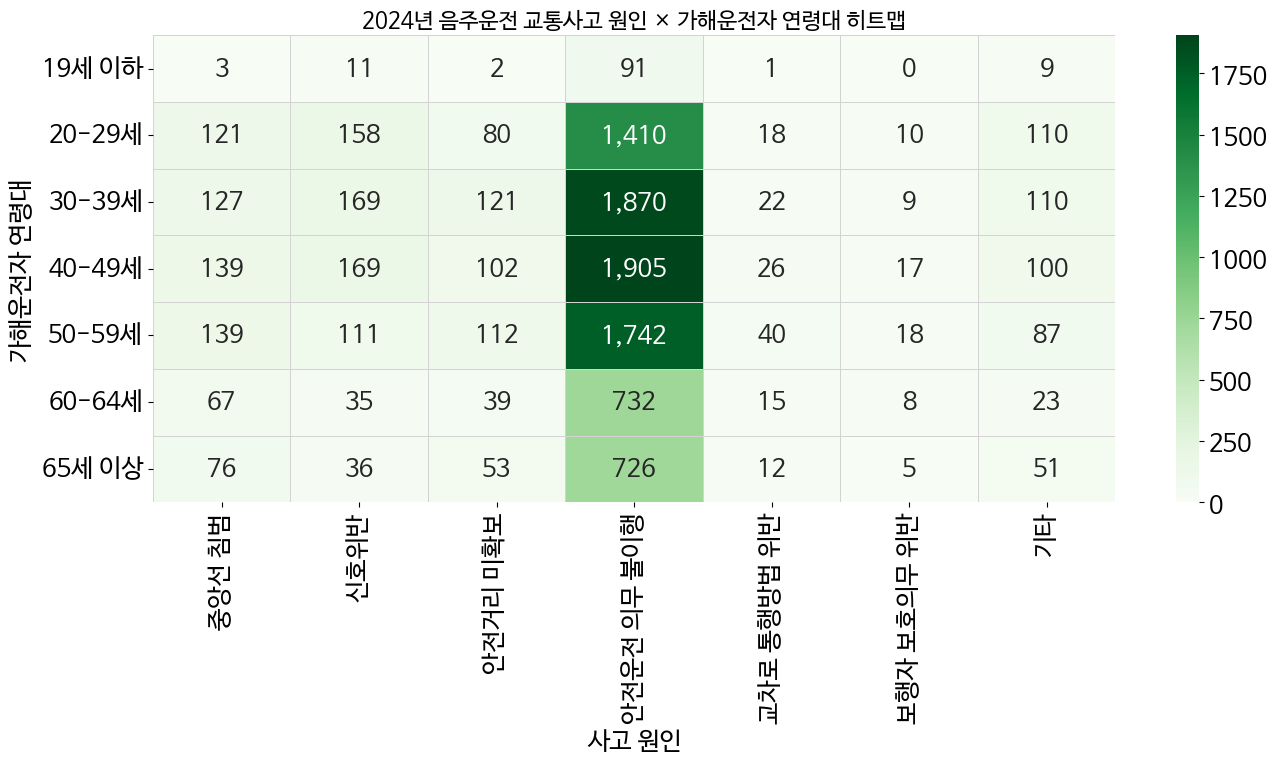

In [10]:
# 2024년 연령별 음주운전 교통사고 원인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

sns.heatmap(
    df_heat,
    cmap="Greens",
    annot=True,
    fmt=",",
    linewidths=0.5,
    linecolor="lightgray"
)

plt.title(
    "2024년 음주운전 교통사고 원인 × 가해운전자 연령대 히트맵",
    fontsize=16
)
plt.xlabel("사고 원인")
plt.ylabel("가해운전자 연령대")

plt.tight_layout()
plt.show()

In [11]:
df_accidents_yearly_raw = df_alcohol2.copy()

# 2. 첫 번째 행을 새로운 컬럼 이름으로 설정하고, 첫 번째 행을 제거한 후 인덱스를 재설정
header_row_0 = df_accidents_yearly_raw.iloc[0].tolist()
new_cols = []
for i, original_col_name in enumerate(df_accidents_yearly_raw.columns):
    if i == 0:
        new_cols.append('월')
    elif i == 1:
        new_cols.append('유형')
    else:
        year_part = str(original_col_name).split('.')[0]
        desc_part = str(header_row_0[i])
        if desc_part == '합계':
            new_cols.append(f"{year_part}_전체합계")
        else:
            new_cols.append(f"{year_part}_{desc_part}")

df_accidents_yearly_raw.columns = new_cols
df_accidents_yearly_raw = df_accidents_yearly_raw.iloc[1:].reset_index(drop=True)

# 3. '월' 컬럼의 값이 '합계'이고 '유형' 컬럼의 값이 '사고[건]'인 행만 필터링
df_yearly_accidents = df_accidents_yearly_raw[
    (df_accidents_yearly_raw['월'] == '합계') &
    (df_accidents_yearly_raw['유형'] == '사고[건]')
].copy()

# 4. 연도별 전체합계 컬럼 선택
# '합계_전체합계' 컬럼을 제외하고, 실제 연도별 컬럼만 선택하도록 수정
yearly_total_cols = [
    col for col in df_yearly_accidents.columns
    if col.endswith('_전체합계') and not col.startswith('합계')
]

# 5. long 형식으로 변환
df_yearly_accidents_long = melt_table(
    df_yearly_accidents,
    id_cols=[],
    value_cols=yearly_total_cols,
    var_name='년도',
    value_name='사고 건수'
)

# 6. '년도' 컬럼에서 불필요한 문자열 제거 및 정수형 변환
df_yearly_accidents_long['년도'] = (
    df_yearly_accidents_long['년도'].astype(str)
    .str.replace('_전체합계', '')
    .astype(int)
)

# 7. '사고 건수' 컬럼을 숫자형으로 변환
df_yearly_accidents_long = to_int(df_yearly_accidents_long, ['사고 건수'])

display(df_yearly_accidents_long.head())
display(df_yearly_accidents_long.info())

,년도,사고 건수
0,2022,15059
1,2023,13042
2,2024,11037


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   년도      3 non-null      int64
 1   사고 건수   3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


None

In [12]:
df_regional_accidents = df_alcohol1_long[
    (df_alcohol1_long['년도'] == 2024) &
    (df_alcohol1_long['연도'] == '사고[건]')
].copy()

df_regional_accidents = df_regional_accidents.sort_values(by='값', ascending=False).reset_index(drop=True)

df_regional_accidents.rename(columns={'값': '사고 건수'}, inplace=True)

display(df_regional_accidents.head())
display(df_regional_accidents.info())

,시도,연도,년도,사고 건수
0,경기,사고[건],2024,3098
1,서울,사고[건],2024,1576
2,충남,사고[건],2024,698
3,경남,사고[건],2024,692
4,인천,사고[건],2024,613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      17 non-null     object
 1   연도      17 non-null     object
 2   년도      17 non-null     int64 
 3   사고 건수   17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 676.0+ bytes


None

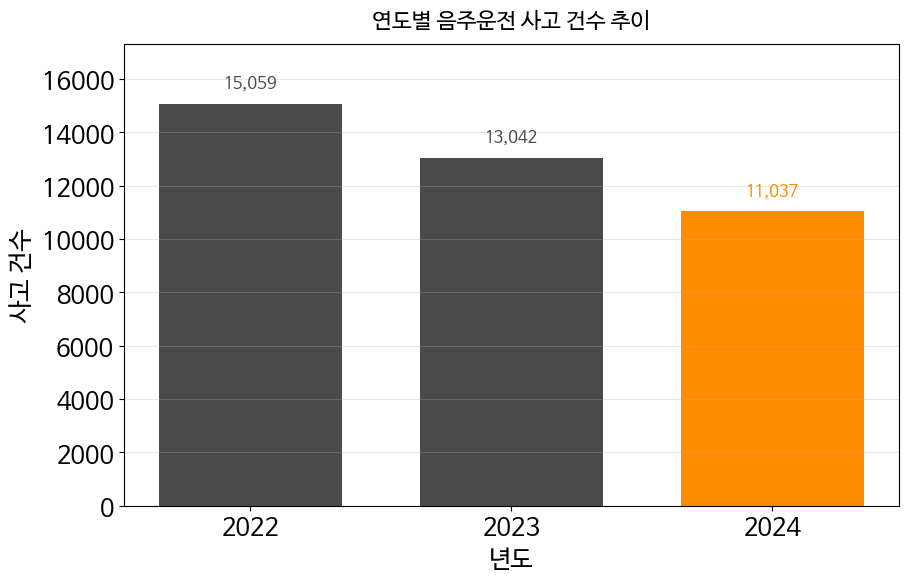

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

years = df_yearly_accidents_long['년도']
accident_counts = df_yearly_accidents_long['사고 건수']

BASE_COLOR = "#4a4a4a"
HIGHLIGHT = "#ff8c00"
colors = [HIGHLIGHT if year == years.max() else BASE_COLOR for year in years]

plt.bar(years, accident_counts, color=colors, width=0.7)

max_val = accident_counts.max()
plt.ylim(0, max_val * 1.15)

for i, count in enumerate(accident_counts):
    plt.text(
        years.iloc[i],
        count + max_val * 0.03,
        f"{count:,}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color=HIGHLIGHT if years.iloc[i] == years.max() else BASE_COLOR
    )

plt.title("연도별 음주운전 사고 건수 추이", fontsize=16, pad=12)
plt.xlabel("년도")
plt.ylabel("사고 건수")

plt.xticks(years.astype(int))
plt.grid(axis="y", alpha=0.3)

plt.subplots_adjust(top=0.88)

plt.show()


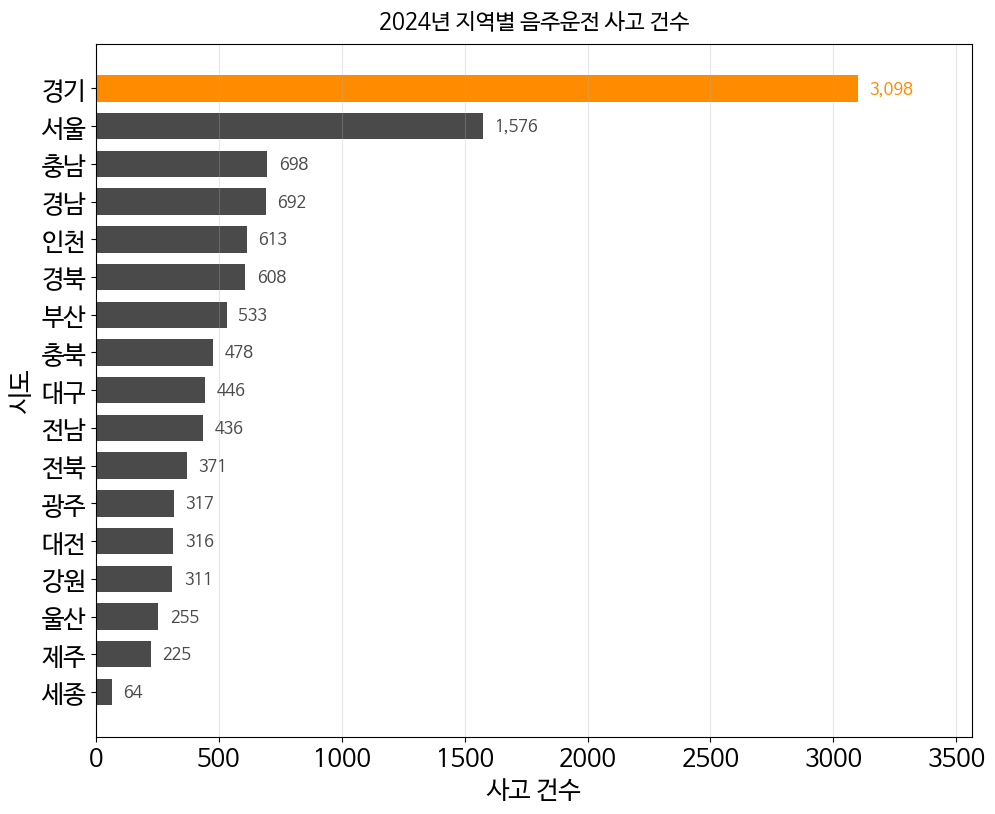

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))

regions = df_regional_accidents['시도']
accident_counts = df_regional_accidents['사고 건수']

BASE_COLOR = "#4a4a4a"
HIGHLIGHT = "#ff8c00"

colors = [
    HIGHLIGHT if count == accident_counts.max() else BASE_COLOR
    for count in accident_counts
]

plt.barh(regions, accident_counts, color=colors, height=0.7)

plt.xlim(0, accident_counts.max() * 1.15)
for i, count in enumerate(accident_counts):
    plt.text(
        count + accident_counts.max() * 0.015,
        i,
        f"{count:,}",
        ha='left',
        va='center',
        fontsize=12,
        fontweight='bold',
        color=HIGHLIGHT if count == accident_counts.max() else BASE_COLOR
    )

plt.title("2024년 지역별 음주운전 사고 건수", fontsize=16, pad=12)
plt.xlabel("사고 건수")
plt.ylabel("시도")

plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)

plt.subplots_adjust(left=0.22, right=0.95)
plt.show()
